# Exploratory Analysis

https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

In [27]:
import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils

In [28]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
processed_file_path = DATA_DIR / 'processed' / 'ames_with_correct_types.pkl'

with open(processed_file_path, 'rb') as file:
    (
        data,
        continuous_variables,
        discrete_variables,
        ordinal_variables,
        categorical_variables,
    ) = pickle.load(file)

## Discrepancies in the price of cities

In [54]:
data['LogPrice'] = np.log10(data['Price'])

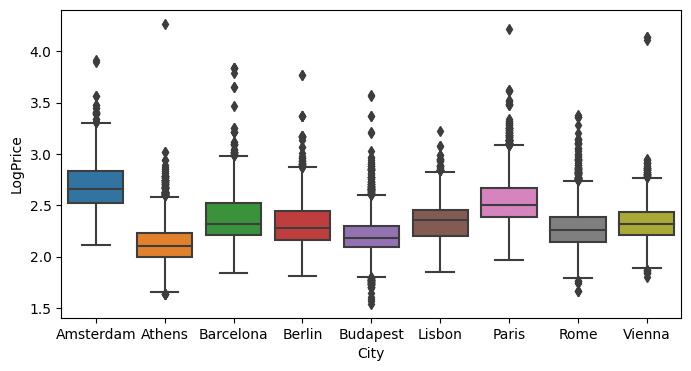

In [56]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
sns.boxplot(data = data, x='City', y='LogPrice')
#ax.set_ylim([0,1300])
plt.show()

Text(0.5, 1.0, 'City Count')

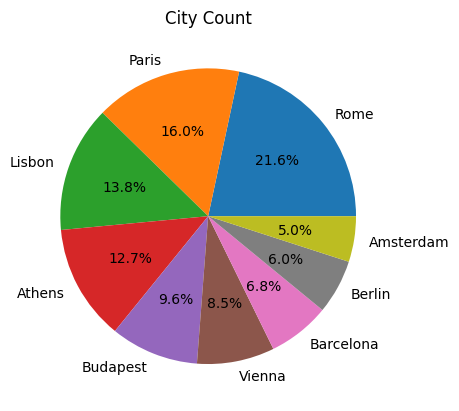

In [30]:
count_city = data['City'].value_counts()
plt.pie(count_city, labels = count_city.index, autopct='%1.1f%%')
plt.title('City Count')

In [31]:
data['City'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64

## Analyzing each county separately

In [57]:
data_amsterdam = data.loc[data['City'] == 'Amsterdam'].copy()
data_athens = data.loc[data['City'] == 'Athens'].copy()
data_paris = data.loc[data['City'] == 'Paris'].copy()

### Amsterdam City

##### Treating Price Outliers 

<Axes: xlabel='LogPrice', ylabel='Density'>

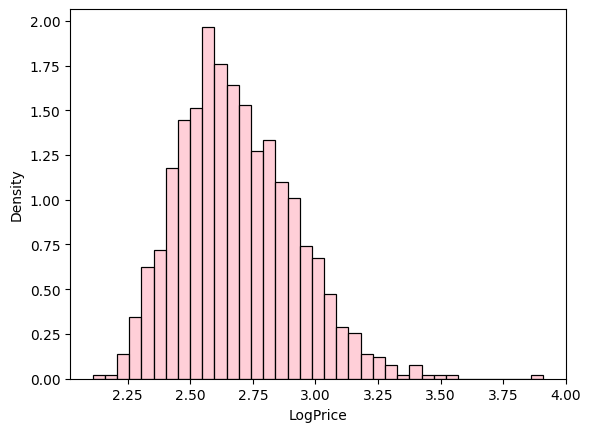

In [59]:
sns.histplot(data_amsterdam['LogPrice'], color = 'pink', stat="density")

In [60]:
q1=data_amsterdam['LogPrice'].quantile(.25)
q2=data_amsterdam['LogPrice'].quantile(.50)
q3=data_amsterdam['LogPrice'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('second quartile is %.1f'%q2)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is %.1f'%limit_low)
print('upper limit is %.1f'%limit_high)

first quartile is 2.5
second quartile is 2.7
third quartile is 2.8
interquartile range is 0.3
lower limit is 1.9
upper limit is 3.5


In [61]:
data_amsterdam = data_amsterdam[data_amsterdam['LogPrice'] < limit_high].copy()

#Airbnb in que first quartile (below 25%)
q1_amsterdam = data_amsterdam[data_amsterdam['LogPrice'] < q1]
#Airbnb in que third quartile (above 75%)
q3_amsterdam = data_amsterdam[data_amsterdam['LogPrice'] > q3]

<Axes: xlabel='LogPrice', ylabel='Count'>

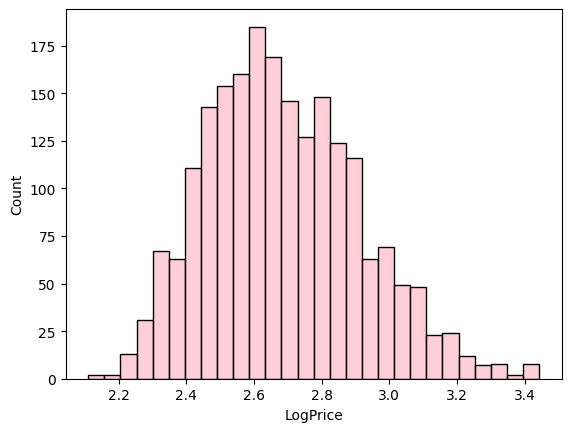

In [62]:
sns.histplot(data_amsterdam['LogPrice'], color = 'pink')

limpando dataset

             count unique              top  freq
City          2074      1        Amsterdam  2074
Day           2074      2          Weekday  1100
Room Type     2074      3  Entire home/apt  1120
Shared Room   2074      2            False  2064
Private Room  2074      2            False  1130
Superhost     2074      2            False  1483


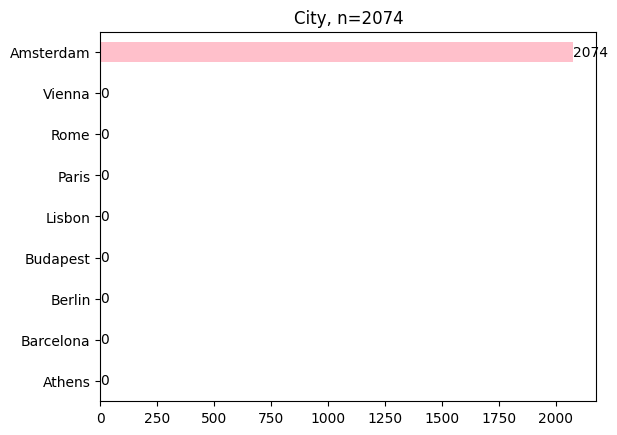

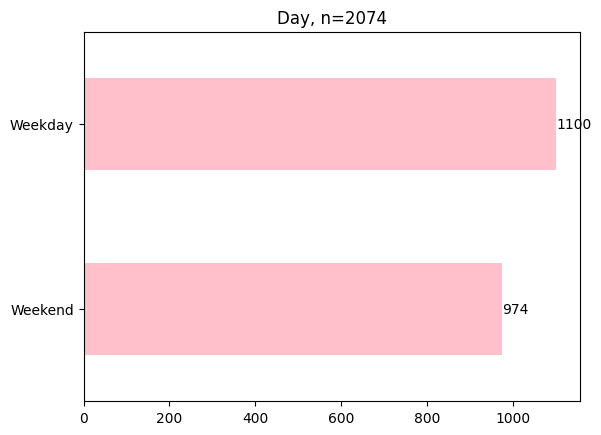

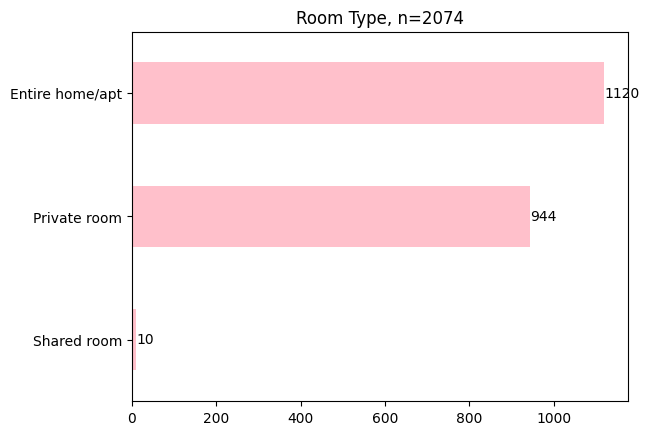

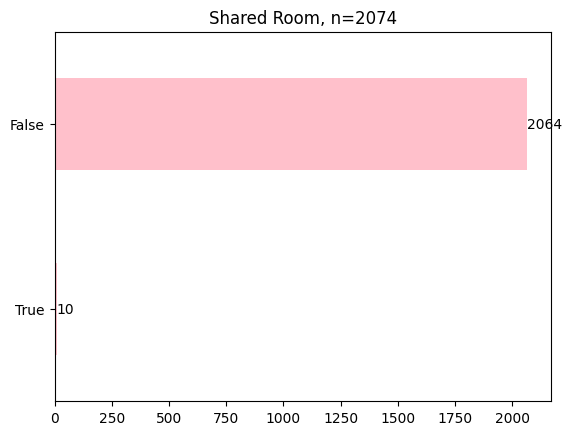

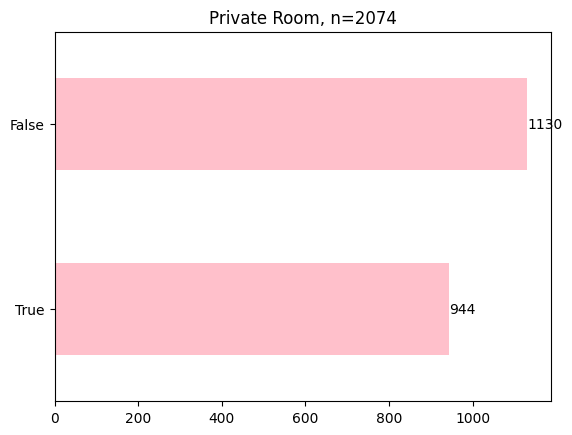

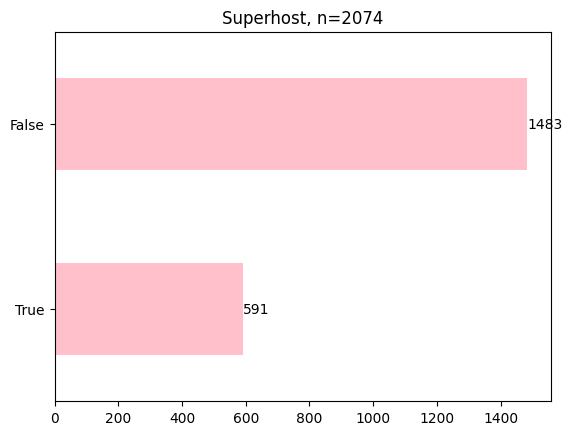

In [63]:
utils.plot_categoricals(data_amsterdam, categorical_variables)

tirando shared rooms

In [64]:
data_amsterdam = data_amsterdam[data_amsterdam['Room Type'] != 'Shared room'].copy()
data_amsterdam.drop(columns = ['Shared Room'], inplace = True)

                  count      mean       std  min  25%  50%  75%  max
Person Capacity  1995.0  2.724311  0.985443  2.0  2.0  2.0  4.0  6.0
Multiple Rooms   1995.0  0.284211  0.451151  0.0  0.0  0.0  1.0  1.0
Business         1995.0  0.107769  0.310167  0.0  0.0  0.0  0.0  1.0
Bedrooms         1995.0  1.247619  0.682815  0.0  1.0  1.0  2.0  5.0


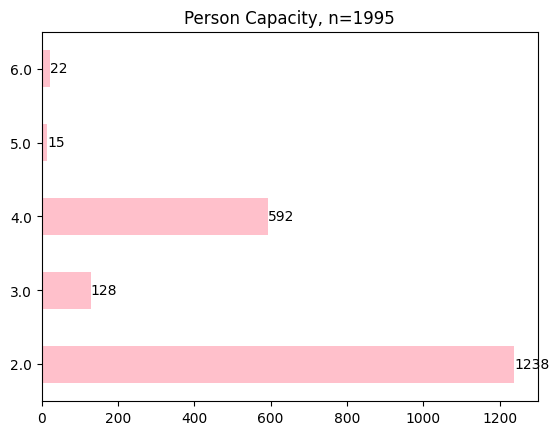

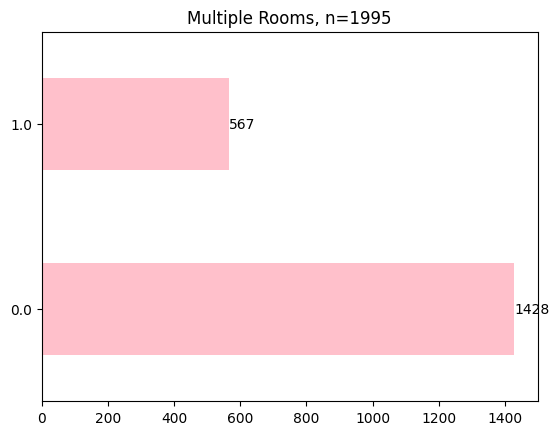

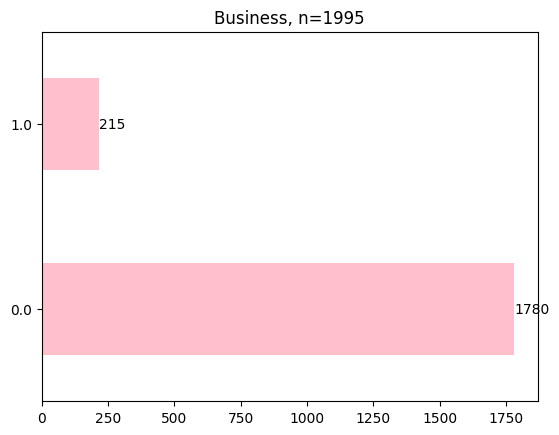

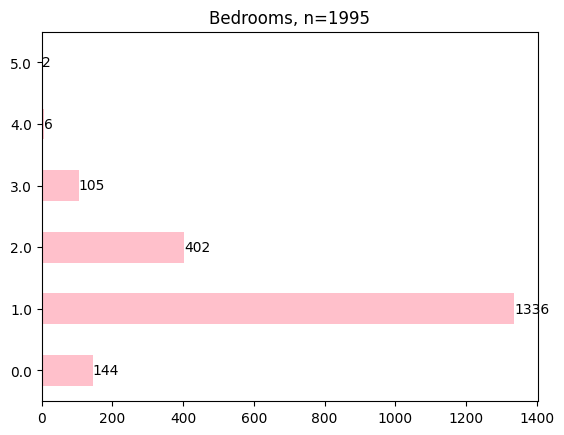

In [39]:
utils.plot_discretes(data_amsterdam, discrete_variables, sorted=False)

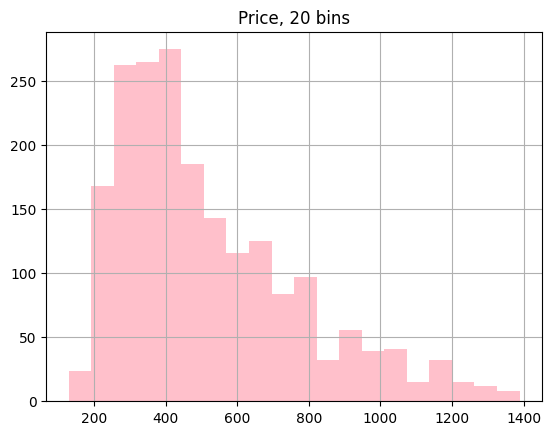

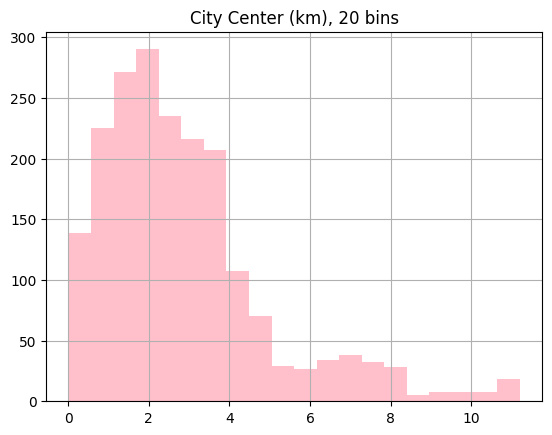

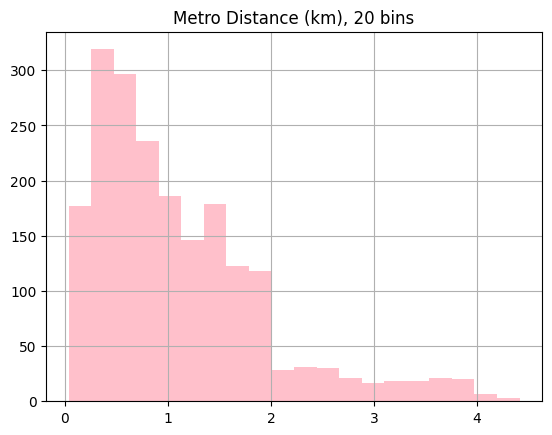

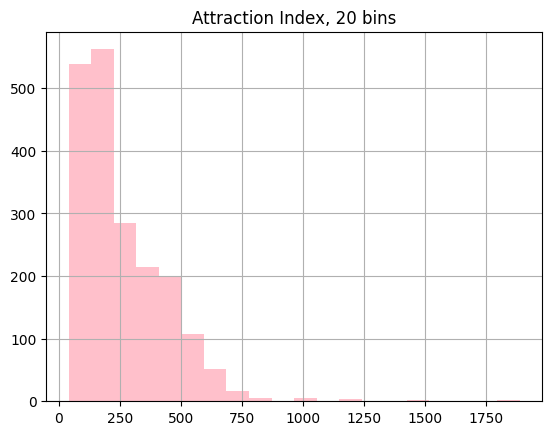

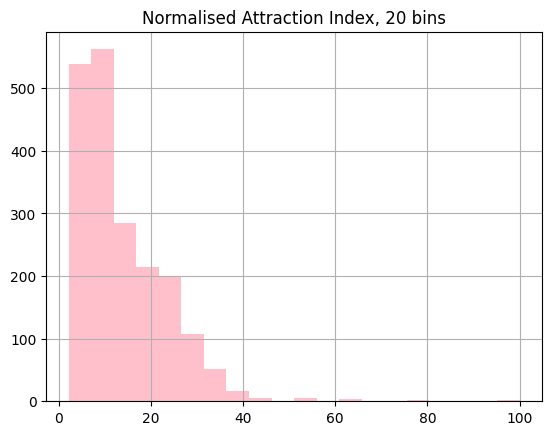

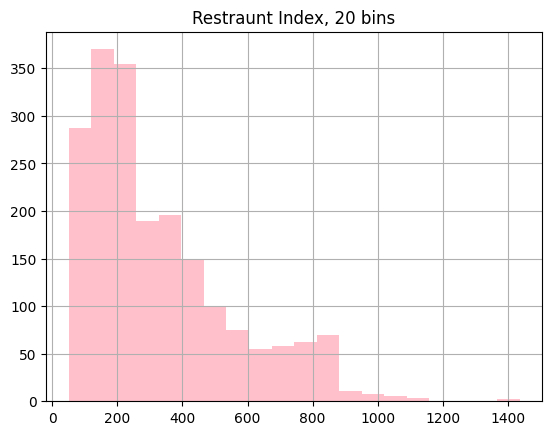

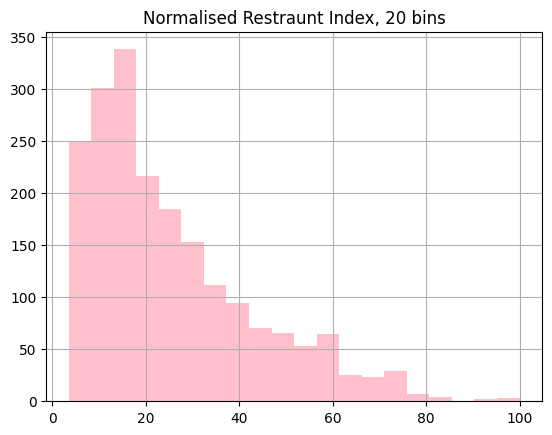

In [40]:
utils.plot_continuous(data_amsterdam, continuous_variables)

<Axes: >

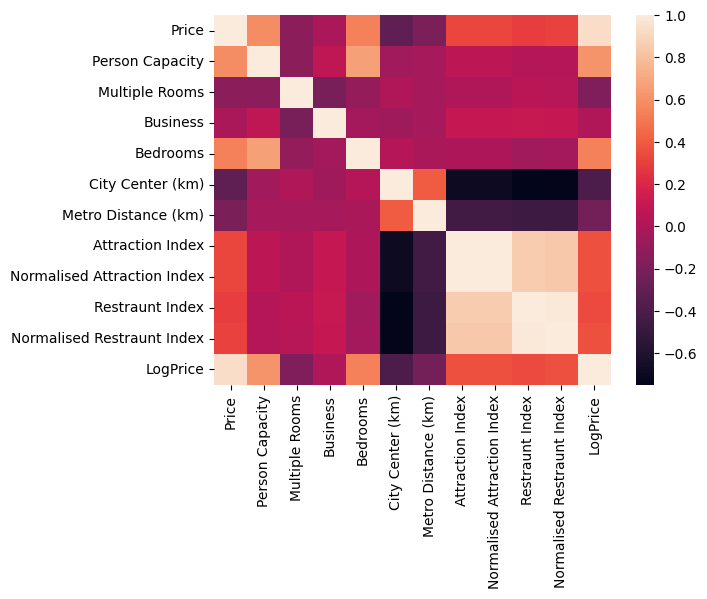

In [65]:
corr = data_amsterdam.corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [68]:
corr['LogPrice'].sort_values()

City Center (km)              -0.396284
Metro Distance (km)           -0.235764
Multiple Rooms                -0.183692
Business                       0.006226
Restraunt Index                0.342895
Normalised Attraction Index    0.358394
Attraction Index               0.358402
Normalised Restraunt Index     0.360303
Bedrooms                       0.537856
Person Capacity                0.613978
Price                          0.936208
LogPrice                       1.000000
Name: LogPrice, dtype: float64

### Athens City

##### Treating Price Outliers 

<Axes: xlabel='LogPrice', ylabel='Count'>

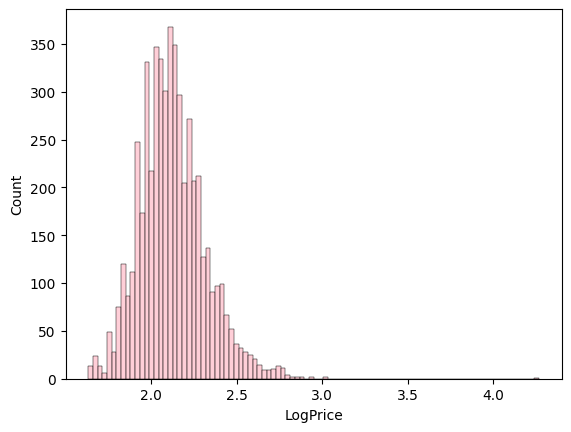

In [70]:
sns.histplot(data_athens['LogPrice'], color = 'pink')

In [71]:
q1=data_athens['LogPrice'].quantile(.25)
q2=data_athens['LogPrice'].quantile(.50)
q3=data_athens['LogPrice'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('second quartile is %.1f'%q2)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is %.1f'%limit_low)
print('upper limit is %.1f'%limit_high)

first quartile is 2.0
second quartile is 2.1
third quartile is 2.2
interquartile range is 0.2
lower limit is 1.5
upper limit is 2.7


In [72]:
data_athens = data_athens[data_athens['LogPrice'] < limit_high].copy()

#Airbnb in que first quartile (below 25%)
q1_athens = data_athens[data_athens['LogPrice'] < q1]
#Airbnb in que third quartile (above 75%)
q3_athens = data_athens[data_athens['LogPrice'] > q3]

<Axes: xlabel='LogPrice', ylabel='Count'>

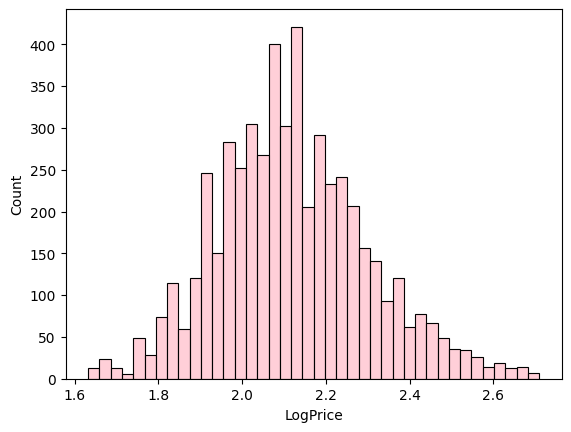

In [73]:
sns.histplot(data_athens['LogPrice'], color = 'pink')

<Axes: >

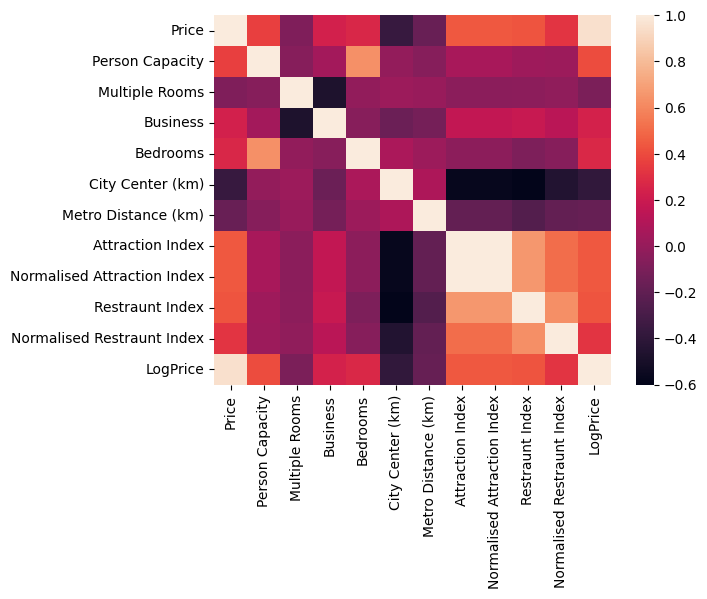

In [74]:
corr_athens = data_athens.corr(numeric_only=True)
sns.heatmap(corr_athens, xticklabels=corr_athens.columns, yticklabels=corr_athens.columns)

In [75]:
corr_athens['LogPrice'].sort_values()

City Center (km)              -0.393558
Metro Distance (km)           -0.179729
Multiple Rooms                -0.098748
Business                       0.242760
Bedrooms                       0.272687
Normalised Restraunt Index     0.320438
Person Capacity                0.401147
Restraunt Index                0.427711
Normalised Attraction Index    0.437351
Attraction Index               0.437357
Price                          0.955460
LogPrice                       1.000000
Name: LogPrice, dtype: float64

### Paris City

##### Treating Price Outliers 

<Axes: xlabel='LogPrice', ylabel='Count'>

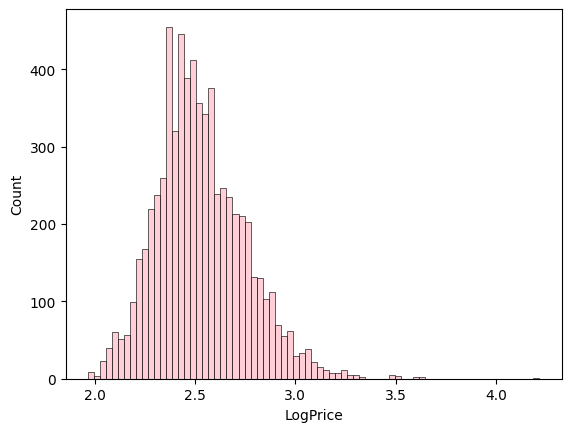

In [76]:
sns.histplot(data_paris['LogPrice'], color = 'pink')

In [77]:
q1=data_paris['LogPrice'].quantile(.25)
q2=data_paris['LogPrice'].quantile(.50)
q3=data_paris['LogPrice'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('second quartile is %.1f'%q2)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is %.1f'%limit_low)
print('upper limit is %.1f'%limit_high)

first quartile is 2.4
second quartile is 2.5
third quartile is 2.7
interquartile range is 0.3
lower limit is 1.8
upper limit is 3.2


In [78]:
data_paris = data_paris[data_paris['LogPrice'] < limit_high].copy()

#Airbnb in que first quartile (below 25%)
q1_paris = data_paris[data_paris['LogPrice'] < q1]
#Airbnb in que third quartile (above 75%)
q3_paris = data_paris[data_paris['LogPrice'] > q3]

<Axes: xlabel='LogPrice', ylabel='Count'>

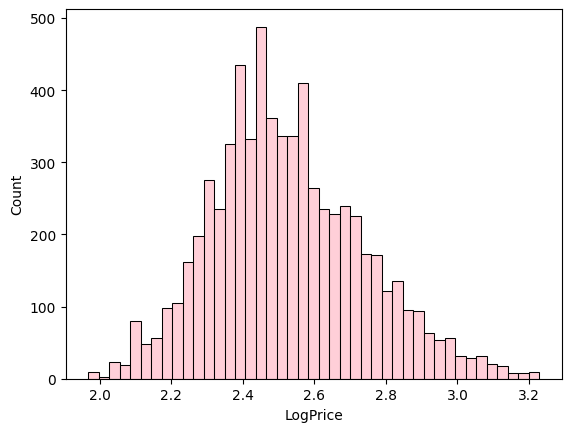

In [79]:
sns.histplot(data_paris['LogPrice'], color = 'pink')

<Axes: >

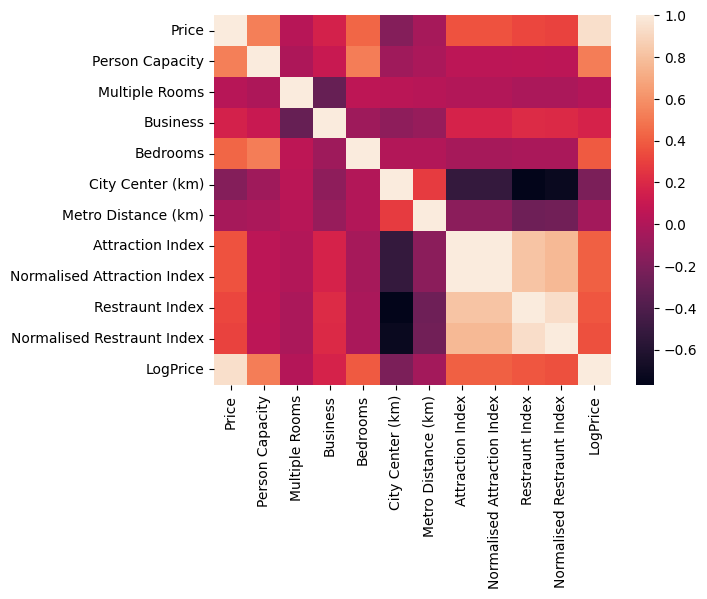

In [80]:
corr_paris = data_paris.corr(numeric_only=True)
sns.heatmap(corr_paris, xticklabels=corr_paris.columns, yticklabels=corr_paris.columns)

In [81]:
corr_paris['LogPrice'].sort_values()

City Center (km)              -0.212176
Metro Distance (km)           -0.054288
Multiple Rooms                 0.017288
Business                       0.166969
Normalised Restraunt Index     0.356900
Restraunt Index                0.375670
Bedrooms                       0.387964
Attraction Index               0.411172
Normalised Attraction Index    0.411196
Person Capacity                0.516367
Price                          0.942944
LogPrice                       1.000000
Name: LogPrice, dtype: float64

Modelo

#### Dicas:

* tentar linear regression, lasso e ridge
* tentar polinomial grau 2
* normalizar pelo poder de compra
* bootstrap